In [14]:
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/Amin/Downloads/Employee.csv'
data = pd.read_csv(file_path)

# Drop the 'Country' column, assuming it's there
if 'Country' in data.columns:
    data = data.drop(columns=['Country'])

# Display the data to the user for confirmation
data.head()


,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,0
1,Infosys,30.0,NaN,Mumbai,0
2,TCS,35.0,2300.0,Calcutta,0
3,Infosys,40.0,3000.0,Delhi,0
4,TCS,23.0,4000.0,Mumbai,0


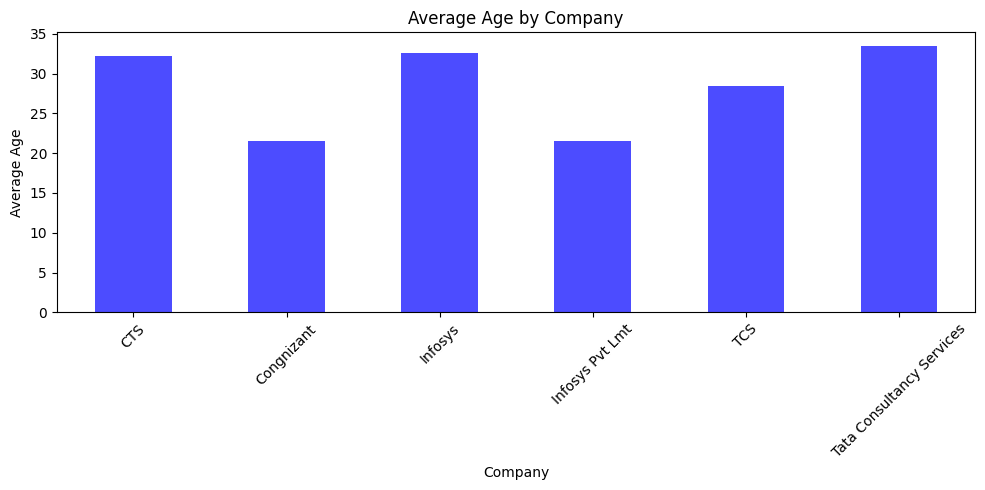

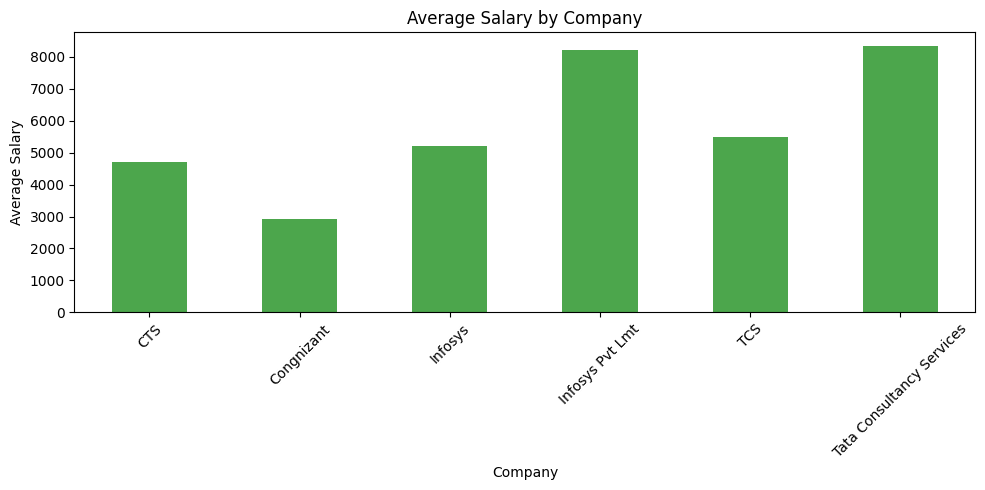

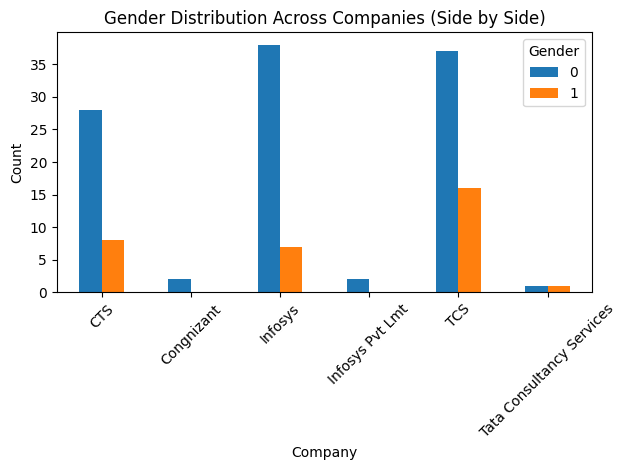

In [15]:
# Creating bar plots for the distribution of Age and Salary by Company
import matplotlib.pyplot as plt

# First, we calculate the mean for Age and Salary by Company to plot
age_means = data.groupby('Company')['Age'].mean()
salary_means = data.groupby('Company')['Salary'].mean()

# Bar plot for 'Age' vs 'Company'
plt.figure(figsize=(10, 5))
age_means.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Age by Company')
plt.xlabel('Company')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for 'Salary' vs 'Company'
plt.figure(figsize=(10, 5))
salary_means.plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Salary by Company')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Modify the previous plot to create a side-by-side (grouped) barplot instead of stacked
gender_company_count = data.groupby(['Company', 'Gender']).size().unstack()

# Plotting the data with side-by-side bars
gender_company_count.plot(kind='bar', stacked=False)

plt.title('Gender Distribution Across Companies (Side by Side)')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


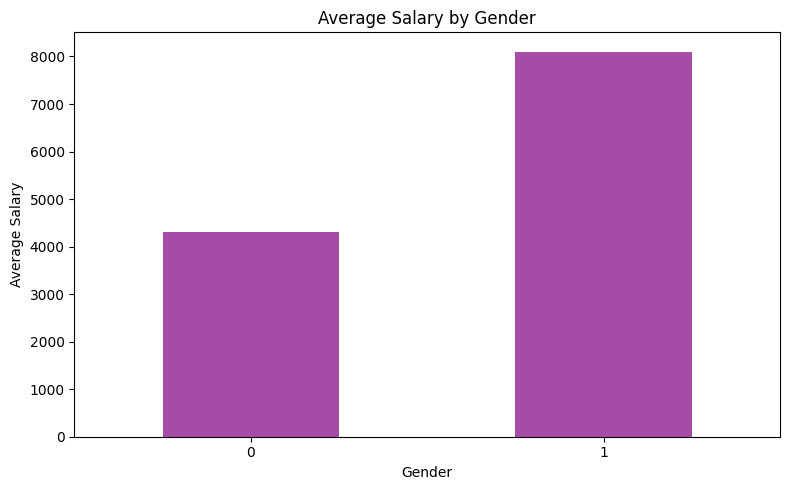

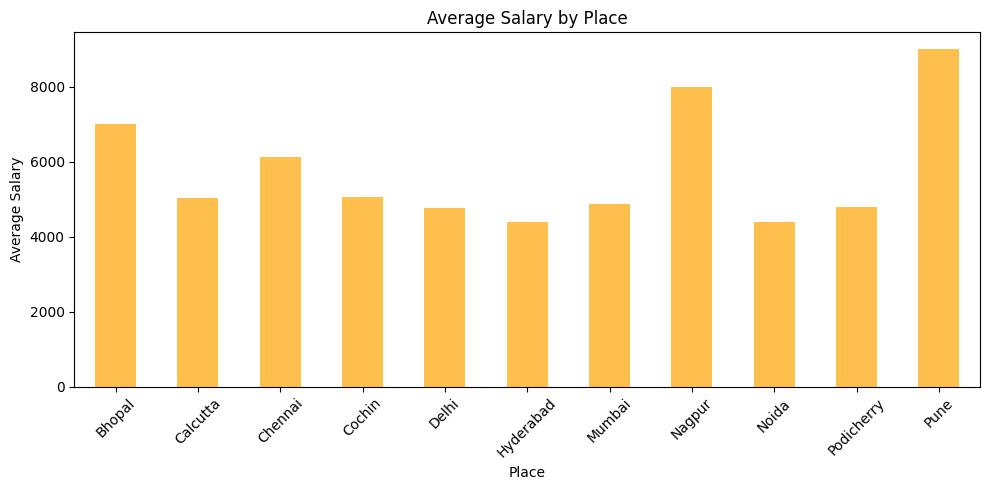

In [16]:
# Bar plots for 'Gender' vs 'Salary' and 'Place' vs 'Salary'

# First, calculate the mean salary for 'Gender' and 'Place'
gender_salary_means = data.groupby('Gender')['Salary'].mean()
place_salary_means = data.groupby('Place')['Salary'].mean()

# Bar plot for 'Gender' vs 'Salary'
plt.figure(figsize=(8, 5))
gender_salary_means.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot for 'Place' vs 'Salary'
plt.figure(figsize=(10, 5))
place_salary_means.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Salary by Place')
plt.xlabel('Place')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

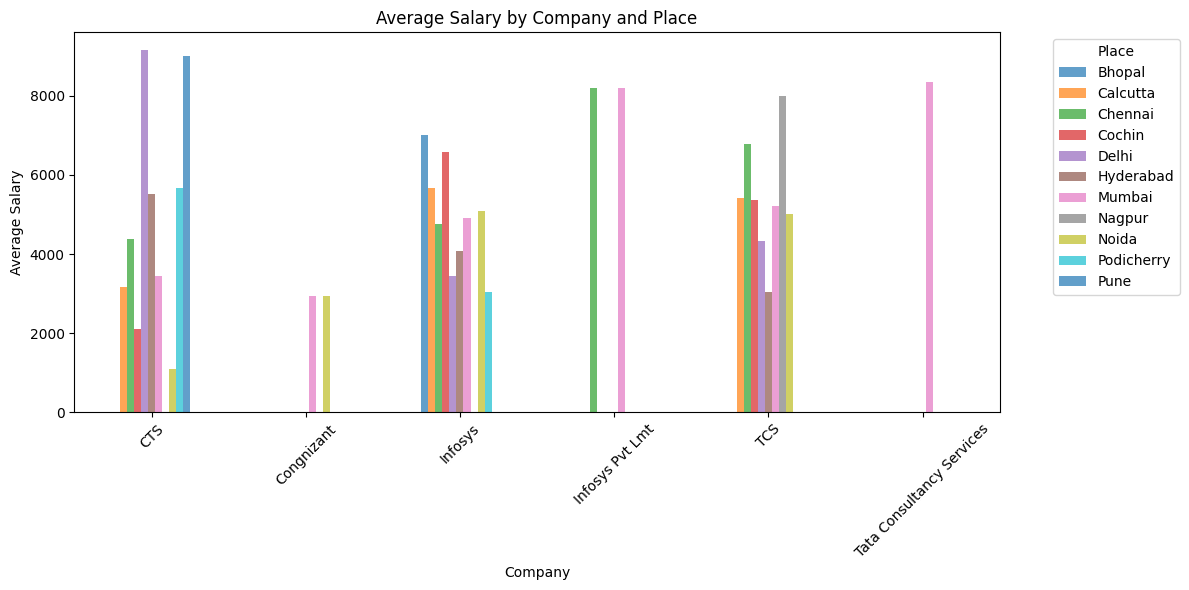

In [17]:
# We will create a grouped bar plot where we compare Salary by Company and further break it down by Place.

# First, group the data by both Company and Place, and calculate the mean salary for each combination
company_place_salary_means = data.groupby(['Company', 'Place'])['Salary'].mean().unstack()

# Create a bar plot for Salary by Company and Place
plt.figure(figsize=(12, 6))
company_place_salary_means.plot(kind='bar', stacked=False, figsize=(12, 6), alpha=0.7)
plt.title('Average Salary by Company and Place')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend(title='Place', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer to fill missing numeric values with the mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the 'Salary' column
data['Salary'] = imputer.fit_transform(data[['Salary']])

# Apply the same imputer to 'Age' before running the model
data['Age'] = imputer.fit_transform(data[['Age']])


output_file_path = 'C:/Users/Amin/Desktop/Amirkabir university/Employee_scaled6.csv'
data.to_csv(output_file_path, index=False)


In [23]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data to work on
data_copy = data.copy()

# Encoding categorical variables
label_encoder_company = LabelEncoder()
label_encoder_place = LabelEncoder()
label_encoder_gender = LabelEncoder()

# Apply encoding
data_copy['Company'] = label_encoder_company.fit_transform(data_copy['Company'].astype(str))
data_copy['Place'] = label_encoder_place.fit_transform(data_copy['Place'].astype(str))
data_copy['Gender'] = label_encoder_gender.fit_transform(data_copy['Gender'])

# Using KNN Imputer to fill missing values of categorical values
knn_imputer = KNNImputer(n_neighbors=3)

# Imputing missing values
data_imputed = pd.DataFrame(knn_imputer.fit_transform(data_copy), columns=data_copy.columns)

# Inverse transform to get original categorical values back
data_imputed['Company'] = label_encoder_company.inverse_transform(data_imputed['Company'].round().astype(int))
data_imputed['Place'] = label_encoder_place.inverse_transform(data_imputed['Place'].round().astype(int))
data_imputed['Gender'] = label_encoder_gender.inverse_transform(data_imputed['Gender'].round().astype(int))

data_imputed.to_csv('filtered_dataset.csv', index=False)


In [24]:
#Using different models to predict salary based on other parameters.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Selecting the relevant columns for modeling (Age and Salary for normalization)
data_model = data_imputed[['Age', 'Salary']]

# Initializing the MinMaxScaler to normalize Age and Salary
scaler = MinMaxScaler()

# Normalizing Age and Salary columns
data_model[['Age', 'Salary']] = scaler.fit_transform(data_model[['Age', 'Salary']])

# Adding back other columns to the normalized dataframe
data_model['Company'] = data['Company']
data_model['Place'] = data['Place']
data_model['Gender'] = data['Gender']

# Splitting the data into features (X) and target (y)
X = data_model.drop(columns=['Salary'])  # Features
y = data_model['Salary']  # Target (Salary)

# Applying one-hot encoding to the categorical variables (Company and Place)
X_encoded = pd.get_dummies(X, columns=['Company', 'Place'], drop_first=True)

# Splitting the dataset into training, validation, and test sets (60% train, 20% validation, 20% test)
X_train_encoded, X_temp_encoded, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.4, random_state=42)
X_val_encoded, X_test_encoded, y_val, y_test = train_test_split(X_temp_encoded, y_temp, test_size=0.5, random_state=42)

# Initialize models
linear_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=2)  # Degree 2 for Polynomial Regression
knn = KNeighborsRegressor(n_neighbors=5)
decision_tree = DecisionTreeRegressor(random_state=42)

# Linear Regression
linear_reg.fit(X_train_encoded, y_train)
y_pred_linear = linear_reg.predict(X_val_encoded)
mse_linear = mean_squared_error(y_val, y_pred_linear)

# Polynomial Regression (on the Age feature only)
X_train_poly_encoded = poly_features.fit_transform(X_train_encoded[['Age']])
X_val_poly_encoded = poly_features.transform(X_val_encoded[['Age']])
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_encoded, y_train)
y_pred_poly = poly_reg.predict(X_val_poly_encoded)
mse_poly = mean_squared_error(y_val, y_pred_poly)

# K-Nearest Neighbors
knn.fit(X_train_encoded, y_train)
y_pred_knn = knn.predict(X_val_encoded)
mse_knn = mean_squared_error(y_val, y_pred_knn)

# Decision Tree
decision_tree.fit(X_train_encoded, y_train)
y_pred_tree = decision_tree.predict(X_val_encoded)
mse_tree = mean_squared_error(y_val, y_pred_tree)

# Collecting final results for all models
results_final = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'KNN', 'Decision Tree'],
    'MSE': [mse_linear, mse_poly, mse_knn, mse_tree]
}

# Display the final results in a DataFrame
results_df_final = pd.DataFrame(results_final)

print(results_df_final)


                   Model       MSE
0      Linear Regression  0.049106
1  Polynomial Regression  0.086046
2                    KNN  0.069631
3          Decision Tree  0.090950


C:\Users\Amin\AppData\Local\Temp\ipykernel_32556\1477853681.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model[['Age', 'Salary']] = scaler.fit_transform(data_model[['Age', 'Salary']])
C:\Users\Amin\AppData\Local\Temp\ipykernel_32556\1477853681.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['Company'] = data['Company']
C:\Users\Amin\AppData\Local\Temp\ipykernel_32556\1477853681.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try